- Komang
- Bayu
- Yasmin

# **Import Library**

In [1]:
# Google Drive Public File/Folder Downloader
# https://pypi.org/project/gdown/
# https://github.com/wkentaro/gdown
!pip install gdown -q -U

# TFJS converter
# !pip install -q tensorflowjs

In [2]:
import json
import gdown
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# **Import Dataset**

- [How to download Google Drive file using Gdown in Python](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-python)
- [How to download Google Drive file using Gdown in terminal command](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-command-line)
- [How to use Python variable in Google Colab terminal command?](https://stackoverflow.com/questions/52851718/how-to-use-python-variables-in-google-colab-terminal-command)

In [3]:
# File ID from Google Drive link
base_url = "https://drive.google.com/uc?id={id}"
file_id = {
    "old_users_data"              : "16ngL0bfyQqucpYIffxkKiCa3qSGhR26S",
    # "new_tourism_with_id_links"   : "10vsiQ3A3kxRkPrIR0rn_qR0ySZ368Pck", # Banyak
    "new_tourism_with_id_links"   : "1jMd_Sj7t3EvONIJDzg8XuqfcT079LpCa", # Sedikit
    "new_tourism_rating_comments" : "1o-phm0eE64NulxzTLM_FWCyiMbfPHsYt",
    "package_tourism"             : "1LtPNXAnkJde03TFHJXqhIbKvtI_FXJxC"
}

# Download all the dataset file using gdown
for filename, id in file_id.items():
  gdown.download(id=id, output=f"{filename}.csv")      # Using Python
  # !gdown {base_url.format(id=id)} -O {filename}.csv  # Using terminal command

Downloading...
From: https://drive.google.com/uc?id=16ngL0bfyQqucpYIffxkKiCa3qSGhR26S
To: /content/old_users_data.csv
100%|██████████| 17.6k/17.6k [00:00<00:00, 30.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMd_Sj7t3EvONIJDzg8XuqfcT079LpCa
To: /content/new_tourism_with_id_links.csv
100%|██████████| 430k/430k [00:00<00:00, 30.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o-phm0eE64NulxzTLM_FWCyiMbfPHsYt
To: /content/new_tourism_rating_comments.csv
100%|██████████| 906k/906k [00:00<00:00, 35.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LtPNXAnkJde03TFHJXqhIbKvtI_FXJxC
To: /content/package_tourism.csv
100%|██████████| 9.89k/9.89k [00:00<00:00, 19.7MB/s]


In [4]:
# Load all dataset in Pandas DataFrame
user_df = pd.read_csv("old_users_data.csv")
tourism_df = pd.read_csv("new_tourism_with_id_links.csv")
rating_df = pd.read_csv("new_tourism_rating_comments.csv")
package_df = pd.read_csv("package_tourism.csv")

In [5]:
print("old_users_data.csv"),               display(user_df.sample(3)),     print("\n")
print("new_tourism_rating_comments.csv"),  display(rating_df.sample(3)),   print("\n")
print("package_tourism.csv"),              display(package_df.sample(3)),  print("\n")
print("new_tourism_with_id_links.csv"),    display(tourism_df.sample(3))

old_users_data.csv


,User_Id,Full_Name,Age,Email,Password
207,208,Wright Fleischmann,27,wfleischmann5r@etsy.com,iE1+7H`cY$iXo6
284,285,Tamarah Monteaux,29,tmonteaux7w@geocities.jp,jH9?f2rg
255,256,Shirley Vaughn,39,svaughn73@yale.edu,"eA9,%B/4'"




new_tourism_rating_comments.csv


,User_Id,Place_Id,Place_Ratings,Comment
7174,225,293,5,"Suasananya enak, pemandangannya cakep banget d..."
5810,182,28,3,Wisata Agro Edukatif Istana Susu Cibugary rasa...
8401,264,35,4,Hampir semua hal di Grand Indonesia Mall sesua...




package_tourism.csv


,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
21,22,Yogyakarta,Air Terjun Kedung Pedut,Puncak Gunung Api Purba - Nglanggeran,Watu Mabur Mangunan,Geoforest Watu Payung Turunan,NaN
37,38,Yogyakarta,Watu Lumbung,Bunker Kaliadem Merapi,Goa Rancang Kencono,Pintoe Langit Dahromo,Wisata Kaliurang
23,24,Yogyakarta,Pantai Indrayanti,Pantai Nglambor,Pantai Parangtritis,Pantai Sundak,Pantai Krakal




new_tourism_with_id_links.csv


,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
99,100,Taman Budaya Yogyakarta,"Budaya, Teater & Pertunjukan, Taman Hiburan",Taman Budaya Yogyakarta (TBY) (Hanacaraka:ꦠꦩꦤ꧀...,Yogyakarta,0,"4,5",210.0,"{'lat': -7.8001041, 'lng': 110.3676579}",-7.800104,110.367658,images_output\Taman Budaya Yogyakarta\Taman Bu...,images_output\Taman Budaya Yogyakarta\Taman Bu...,images_output\Taman Budaya Yogyakarta\Taman Bu...
304,305,Sunrise Point Cukul,Cagar Alam,Sunrise Point Cukul merupakan salah satu tempa...,Bandung,10000,"4,6",NaN,"{'lat': -7.233689000000002, 'lng': 107.5342933}",-7.233689,107.534293,images_output\Sunrise Point Cukul\Sunrise Poin...,images_output\Sunrise Point Cukul\Sunrise Poin...,NaN
384,385,Kampung Batik Gedong Semarang,Budaya,Kampung Batik Semarang merupakan salah satu ka...,Semarang,0,"4,4",45.0,"{'lat': -6.968882100000001, 'lng': 110.4318692}",-6.968882,110.431869,images_output\Kampung Batik Gedong Semarang\Ka...,images_output\Kampung Batik Gedong Semarang\Ka...,NaN


(None, None)

# **Data Assessment**


## **user_df**

In [6]:
user_df.sample(5)

,User_Id,Full_Name,Age,Email,Password
53,54,Addy Greswell,31,agreswell1h@sphinn.com,eK8!i\/2+NR
219,220,Stanislaus Shoulders,23,sshoulders63@ezinearticles.com,uB6'Uy#i)I
173,174,Manolo Malafe,32,mmalafe4t@smh.com.au,"nX3),_f"""
58,59,Fee Pruvost,26,fpruvost1m@microsoft.com,"oF4|9Z?K1s""<x6"
270,271,Hirsch Rosenblatt,37,hrosenblatt7i@ifeng.com,yR9+zkJd#BbSE


In [7]:
print(user_df.info())
user_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_Id    300 non-null    int64 
 1   Full_Name  300 non-null    object
 2   Age        300 non-null    int64 
 3   Email      300 non-null    object
 4   Password   300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB
None


,0
User_Id,0
Full_Name,0
Age,0
Email,0
Password,0


## **tourism_df**

In [8]:
tourism_df.sample(3)

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
129,130,Studio Alam Gamplong,Taman Hiburan,Studio Gamplong atau Studio Alam Gamplong adal...,Yogyakarta,10000,"4,4",120.0,"{'lat': -7.805793599999998, 'lng': 110.2367304}",-7.805794,110.236730,images_output\Studio Alam Gamplong\Studio Alam...,images_output\Studio Alam Gamplong\Studio Alam...,NaN
1,2,Kota Tua,Budaya,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta,0,"4,6",90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,images_output\Kota Tua\Kota Tua_0.jpg,images_output\Kota Tua\Kota Tua_1.jpg,NaN
174,175,Museum Ullen Sentalu,"Budaya, Situs Sejarah","Museum Ullen Sentalu, (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ꧀​ꦈ...",Yogyakarta,100000,"4,7",120.0,"{'lat': -7.5978656, 'lng': 110.4233959}",-7.597866,110.423396,images_output\Museum Ullen Sentalu\Museum Ulle...,images_output\Museum Ullen Sentalu\Museum Ulle...,images_output\Museum Ullen Sentalu\Museum Ulle...


In [9]:
print(tourism_df.info())
tourism_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   Description   437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    object 
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Img_Path_0    437 non-null    object 
 12  Img_Path_1    358 non-null    object 
 13  Img_Path_2    166 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 47.9+ KB
None


,0
Place_Id,0
Place_Name,0
Category,0
Description,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [10]:
# Melihat semua kategori unik
categories_set = set()
for data in tourism_df['Category'].tolist():
  categories = data.split(', ')
  for category in categories:
    categories_set.add(category)

print(len(categories_set))
for index, data in enumerate(categories_set):
  print(index, data)

9
0 Situs Sejarah
1 Budaya
2 Cagar Alam
3 Teater & Pertunjukan
4 Pusat Perbelanjaan
5 Tempat Ibadah
6 Bahari
7 Taman Hiburan
8 Kebun Binatang


## **rating_df**

In [11]:
rating_df.sample(3)

,User_Id,Place_Id,Place_Ratings,Comment
1708,55,95,3,Desa Wisata Sungai Code Jogja Kota rasanya aga...
6045,189,108,5,Kalau bisa kasih lebih dari 5 bintang buat Emb...
7972,250,207,1,"Seriusan deh, Heha Sky View tuh mengecewakan b..."


In [12]:
print(rating_df.info())
rating_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        9597 non-null   int64 
 1   Place_Id       9597 non-null   int64 
 2   Place_Ratings  9597 non-null   int64 
 3   Comment        9597 non-null   object
dtypes: int64(3), object(1)
memory usage: 300.0+ KB
None


,0
User_Id,0
Place_Id,0
Place_Ratings,0
Comment,0


## **package_df**

In [13]:
print("package_tourism.csv")
print(package_df.info())
package_df.isnull().sum()

package_tourism.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None


,0
Package,0
City,0
Place_Tourism1,0
Place_Tourism2,0
Place_Tourism3,0
Place_Tourism4,34
Place_Tourism5,61


# **Preprocessing**

## **Data Cleaning**

In [14]:
# Fill missing Time_Minutes with the median
tourism_df.fillna({
    'Time_Minutes': tourism_df['Time_Minutes'].median()
}, inplace=True)

In [15]:
tourism_df.isnull().sum()
tourism_df

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
0,1,Monumen Nasional,"Budaya, Situs Sejarah",Monumen Nasional atau yang populer disingkat d...,Jakarta,20000,"4,6",15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,images_output\Monumen Nasional\Monumen Nasiona...,images_output\Monumen Nasional\Monumen Nasiona...,images_output\Monumen Nasional\Monumen Nasiona...
1,2,Kota Tua,Budaya,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta,0,"4,6",90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,images_output\Kota Tua\Kota Tua_0.jpg,images_output\Kota Tua\Kota Tua_1.jpg,NaN
2,3,Dunia Fantasi,"Taman Hiburan, Bahari",Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta,270000,"4,6",360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,images_output\Dunia Fantasi\Dunia Fantasi_0.jpg,images_output\Dunia Fantasi\Dunia Fantasi_1.png,images_output\Dunia Fantasi\Dunia Fantasi_2.jpg
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Taman Mini Indonesia Indah merupakan suatu kaw...,Jakarta,10000,"4,5",60.0,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,images_output\Taman Mini Indonesia Indah (TMII...,images_output\Taman Mini Indonesia Indah (TMII...,images_output\Taman Mini Indonesia Indah (TMII...
4,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,94000,"4,5",60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,images_output\Atlantis Water Adventure\Atlanti...,images_output\Atlantis Water Adventure\Atlanti...,images_output\Atlantis Water Adventure\Atlanti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Budaya,Museum Negeri Mpu Tantular adalah sebuah museu...,Surabaya,2000,"4,4",45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,images_output\Museum Mpu Tantular\Museum Mpu T...,images_output\Museum Mpu Tantular\Museum Mpu T...,NaN
433,434,Taman Bungkul,Taman Hiburan,Taman Bungkul adalah taman wisata kota yang te...,Surabaya,0,"4,6",60.0,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,images_output\Taman Bungkul\Taman Bungkul_0.jpg,images_output\Taman Bungkul\Taman Bungkul_1.jpg,images_output\Taman Bungkul\Taman Bungkul_2.jpg
434,435,Taman Air Mancur Menari Kenjeran,"Taman Hiburan, Bahari",Air mancur menari atau dancing fountain juga a...,Surabaya,0,"4,4",45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,images_output\Taman Air Mancur Menari Kenjeran...,images_output\Taman Air Mancur Menari Kenjeran...,NaN
435,436,Taman Flora Bratang Surabaya,Taman Hiburan,Taman Flora adalah salah satu taman kota di Su...,Surabaya,0,"4,6",60.0,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,images_output\Taman Flora Bratang Surabaya\Tam...,NaN,NaN


## **Create User Vector Basket**

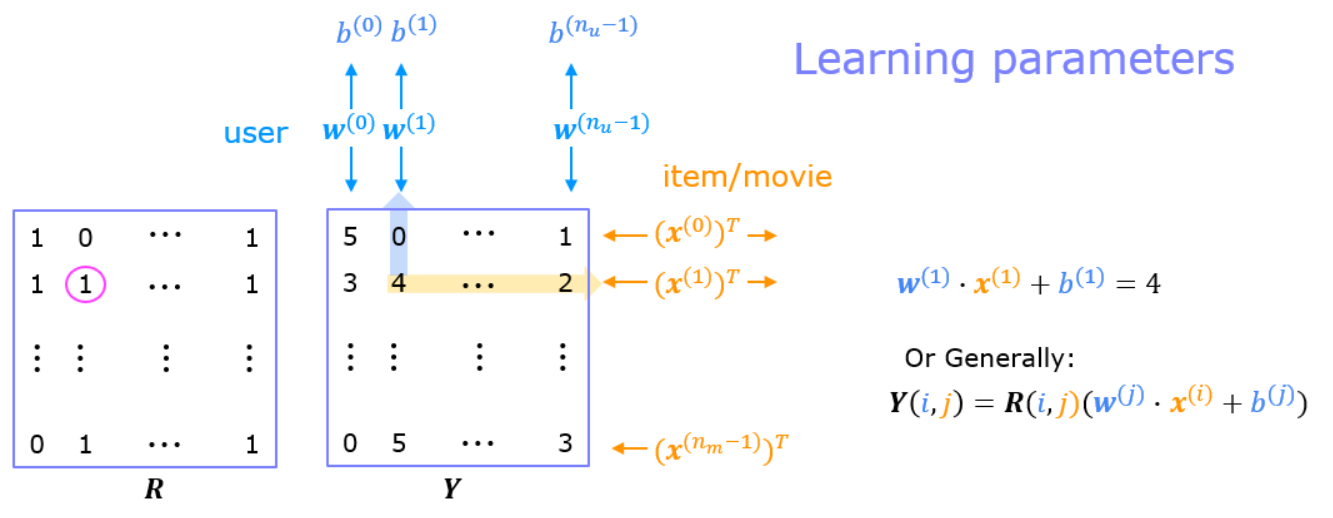

In [16]:
# data = {
#     "Place_Id": [1, 2, 3, 4, 5],
#     "1": [0, 0, 0, 0, 5],
#     "2": [0, 5, 0, 0, 0],
#     "3": [0, 0, 0, 4, 0],
#     "4": [0, 0, 0, 3, 0],
#     "5": [0, 0, 0, 4, 0]
#     # Tambahkan hingga 437 Place_Id
# }
# user_vector = pd.DataFrame(data).set_index("Place_Id")

# # Menghitung rata-rata rating hanya untuk nilai lebih dari nol
# average_ratings = np.round(user_vector.replace(0, np.nan).mean(axis=1), 1)
# average_ratings = average_ratings.fillna(0)

# # Menambahkan User_Id = 0 dengan rata-rata
# user_vector.loc[:, 0] = average_ratings

# # Menampilkan hasil
# print(user_vector)

In [17]:
def get_user_vector_basket(rating_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:

  def encode_values(x):
    if x == 0:
      return 0
    if x > 0:
      return 1

  user_vector = rating_df.groupby(['Place_Id', 'User_Id'])['Place_Ratings']\
                .sum().unstack().reset_index().fillna(0).set_index('Place_Id')

  # Menghitung rata-rata rating hanya untuk nilai lebih dari nol
  average_ratings = np.round(user_vector.replace(0, np.nan).mean(axis=1), 1)
  average_ratings = average_ratings.fillna(0)

  # Menambahkan User_Id = 0 dengan rata-rata di kolom paling kiri
  user_vector.insert(0, 0, average_ratings)

  # Encode user vector ke 0 dan 1
  user_vector_encoded = user_vector.map(encode_values)

  return user_vector, user_vector_encoded

In [18]:
user_vector, user_vector_encoded = get_user_vector_basket(rating_df)
Y = user_vector.to_numpy(copy=True)
R = user_vector_encoded.to_numpy(copy=True)

display(user_vector)
display(user_vector_encoded)

User_Id,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
Place_Id,,,,,,,,,,,,,,,,,,,,,
1,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.8,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.9,0.0,0.0,0.0,4.0,3.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.5,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3.4,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,2.4,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


User_Id,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
Place_Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
434,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
def normalize_ratings(Y: np.ndarray, R:np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    Y_mean = (np.sum(Y * R, axis=1) / (np.sum(R, axis=1) + 1e-12)).reshape(-1,1)
    Y_norm = Y - np.multiply(Y_mean, R)
    return (Y_norm, Y_mean)

# Normalize the Dataset
Y_norm, Y_mean = normalize_ratings(Y, R)

In [20]:
np.save('Y_mean.npy', Y_mean)

# **Collaborative Filtering Model**

## **Custom Layer**

In [21]:
@keras.saving.register_keras_serializable(package='CollaborativeFiltering')
class CollaborativeFilteringLayer(tf.keras.layers.Layer):

  def __init__(self, num_users, num_tourism, num_features, name='collaborative_filtering_layer', **kwargs):
    super(CollaborativeFilteringLayer, self).__init__(name=name, **kwargs)
    self.num_users = num_users
    self.num_tourism = num_tourism
    self.num_features = num_features

    self.X = self.add_weight(
      shape=(self.num_tourism, self.num_features),
      initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=tf.random.set_seed(42)),
      dtype=tf.float32,
      trainable=True,
      name='X'
    )

    self.W = self.add_weight(
      shape=(self.num_users, self.num_features),
      initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=tf.random.set_seed(42)),
      dtype=tf.float32,
      trainable=True,
      name='W'
    )

    self.b = self.add_weight(
      shape=(1, self.num_users),
      initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=tf.random.set_seed(42)),
      dtype=tf.float32,
      trainable=True,
      name='b'
    )

  def call(self, inputs):
    if tf.math.equal(inputs, tf.constant(-1, dtype=tf.int32)):  # inputs = id
      return tf.matmul(self.X, self.W, transpose_b=True) + self.b
    else:
      return tf.matmul(self.X, tf.reshape(self.W[inputs], (-1, 1))) + self.b[:, inputs]

  def get_config(self):
    # config = super(CollaborativeFilteringLayer, self).get_config()
    config = super().get_config()
    config.update({
        'num_users': self.num_users,
        'num_tourism': self.num_tourism,
        'num_features': self.num_features
    })
    return config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

## **Custom Model**

In [22]:
# Define the custom model
@keras.saving.register_keras_serializable(package='CollaborativeFiltering')
class CollaborativeFilteringModel(tf.keras.Model):
  def __init__(self, num_users, num_tourism, num_features, name='collaborative_filtering_model', **kwargs):
    super(CollaborativeFilteringModel, self).__init__(name=name, **kwargs)
    self.num_users = num_users
    self.num_tourism = num_tourism
    self.num_features = num_features
    self.collaborative_filtering = CollaborativeFilteringLayer(num_users, num_tourism, num_features)

  def call(self, inputs):
    return self.collaborative_filtering(inputs)

  def get_config(self):
    config = super().get_config()
    config.update({
        'num_users': self.num_users,
        'num_tourism': self.num_tourism,
        'num_features': self.num_features
    })
    return config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

In [23]:
def cofi_cost_function(X, W, R, Y_true, Y_pred, lambda_):
  loss = (Y_pred - Y_true) * R
  cost = 0.5 * tf.reduce_sum(loss**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
  return cost

## **Training**

In [24]:
# Importance variables
num_tourism, num_users = Y.shape
num_features = 64

# instantiate collaborative filtering and the optimizer
cofi = CollaborativeFilteringModel(num_users, num_tourism, num_features)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

In [25]:
inputs = tf.constant(-1, dtype=tf.int32)
epochs = 1500

# Pastikan semua tensor menggunakan float32 sejak awal
Y_norm = tf.constant(Y_norm, dtype=tf.float32)
lambda_ = tf.constant(1.0, dtype=tf.float32)

for epoch in range(1, epochs + 1):
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost
    with tf.GradientTape() as tape:

        # Predict all the user ratings
        Y_pred = cofi(inputs)

        # Compute the cost (forward pass included in cost)
        cost_value = cofi_cost_function(cofi.layers[0].X, cofi.layers[0].W, R, Y_norm, Y_pred, lambda_)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grads = tape.gradient( cost_value, [cofi.layers[0].X, cofi.layers[0].W, cofi.layers[0].b] )

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients( zip(grads, [cofi.layers[0].X, cofi.layers[0].W, cofi.layers[0].b]) )

    # Log periodically.
    if epoch % 20 == 0:
      print(f"Training loss at epoch {epoch}: {cost_value:0.1f}")

Training loss at epoch 20: 16882.6
Training loss at epoch 40: 7750.3
Training loss at epoch 60: 4656.7
Training loss at epoch 80: 3278.9
Training loss at epoch 100: 2569.3
Training loss at epoch 120: 2171.1
Training loss at epoch 140: 1934.7
Training loss at epoch 160: 1786.9
Training loss at epoch 180: 1690.1
Training loss at epoch 200: 1623.6
Training loss at epoch 220: 1576.3
Training loss at epoch 240: 1541.5
Training loss at epoch 260: 1515.2
Training loss at epoch 280: 1494.9
Training loss at epoch 300: 1479.0
Training loss at epoch 320: 1466.3
Training loss at epoch 340: 1456.2
Training loss at epoch 360: 1447.9
Training loss at epoch 380: 1441.2
Training loss at epoch 400: 1435.7
Training loss at epoch 420: 1431.1
Training loss at epoch 440: 1427.4
Training loss at epoch 460: 1424.2
Training loss at epoch 480: 1421.6
Training loss at epoch 500: 1419.5
Training loss at epoch 520: 1417.7
Training loss at epoch 540: 1416.1
Training loss at epoch 560: 1414.9
Training loss at epoch 

## **Prediction**

In [26]:
# Make a prediction using trained weights and biases
def get_recommendations(cofi_layer, user_id):
  user_id = tf.constant(user_id, dtype=tf.int32)
  my_pred = cofi_layer(user_id)
  my_pred = my_pred + Y_mean # restore the mean
  my_pred = tf.reshape(my_pred, (-1))

  # sort predictions
  ix = tf.argsort(my_pred, direction='DESCENDING')

  return ix, my_pred

# Print recommendations
def print_recommendations(ix, my_pred, num_recom):
  for i, tourist_spots_idx in enumerate(ix):
    if i == num_recom:
      break
    j = tourist_spots_idx.numpy()
    print(f'Predicting rating {my_pred[j]:0.2f} for {tourism_df.loc[j, "Place_Name"]}')

In [27]:
# Print 20 recommendations
user_id = 120
num_recom = 20

ix, my_pred = get_recommendations(cofi, user_id)
print_recommendations(ix, my_pred, num_recom)

Predicting rating 4.89 for Puncak Segoro
Predicting rating 4.88 for Goa Rong
Predicting rating 4.87 for Wisata Agro Edukatif Istana Susu Cibugary
Predicting rating 4.85 for Museum Bahari Jakarta
Predicting rating 4.84 for Masjid Agung Ungaran
Predicting rating 4.84 for Pantai Ngobaran
Predicting rating 4.82 for Farm House Susu Lembang
Predicting rating 4.81 for Chingu Cafe Little Seoul
Predicting rating 4.73 for Pantai Baron
Predicting rating 4.62 for Tafso Barn
Predicting rating 4.52 for Taman Balai Kota Bandung
Predicting rating 4.50 for Monumen Nasional
Predicting rating 4.48 for Pantai Ngrenehan
Predicting rating 4.21 for Bunker Kaliadem Merapi
Predicting rating 4.19 for Monumen Yogya Kembali
Predicting rating 4.18 for Wisata Lereng Kelir
Predicting rating 4.14 for Taman Pelangi Yogyakarta
Predicting rating 4.14 for Margasatwa Muara Angke
Predicting rating 4.13 for Lawangwangi Creative Space
Predicting rating 4.12 for Water Blaster Bukit Candi Golf


## **Save and Load Model**

In [28]:
cofi.save("collaborative_filtering.h5")
reconstructed_cofi_model = tf.keras.models.load_model("collaborative_filtering.h5", custom_objects={
    'CollaborativeFilteringModel': CollaborativeFilteringModel,
    'CollaborativeFilteringLayer': CollaborativeFilteringLayer
})

user_id = 120
num_recom = 20

ix, my_pred = get_recommendations(reconstructed_cofi_model, user_id)
print_recommendations(ix, my_pred, num_recom)

Predicting rating 4.89 for Puncak Segoro
Predicting rating 4.88 for Goa Rong
Predicting rating 4.87 for Wisata Agro Edukatif Istana Susu Cibugary
Predicting rating 4.85 for Museum Bahari Jakarta
Predicting rating 4.84 for Masjid Agung Ungaran
Predicting rating 4.84 for Pantai Ngobaran
Predicting rating 4.82 for Farm House Susu Lembang
Predicting rating 4.81 for Chingu Cafe Little Seoul
Predicting rating 4.73 for Pantai Baron
Predicting rating 4.62 for Tafso Barn
Predicting rating 4.52 for Taman Balai Kota Bandung
Predicting rating 4.50 for Monumen Nasional
Predicting rating 4.48 for Pantai Ngrenehan
Predicting rating 4.21 for Bunker Kaliadem Merapi
Predicting rating 4.19 for Monumen Yogya Kembali
Predicting rating 4.18 for Wisata Lereng Kelir
Predicting rating 4.14 for Taman Pelangi Yogyakarta
Predicting rating 4.14 for Margasatwa Muara Angke
Predicting rating 4.13 for Lawangwangi Creative Space
Predicting rating 4.12 for Water Blaster Bukit Candi Golf


In [29]:
# !tensorflowjs_converter --input_format=keras my_model.h5 ./

In [30]:
# !zip my_model.zip *.bin model.json

# from google.colab import files
# files.download("/content/my_model.zip")